In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
import catboost as cb
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
train_df = pd.read_csv("preprocessed_train.csv", encoding='euc-kr')

In [4]:
train_df.head()

,분석데이터,label,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,...,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
0,1,1,144,12.298611,1771,5.356616,0,0,0,1,...,10,4,10,9,4,0,1,0,0,0
1,2,1,804,9.580846,7703,6.063542,0,0,0,6,...,43,121,84,78,47,36,40,45,27,36
2,3,0,2205,12.736054,28083,6.107050,9,0,0,6,...,326,268,239,286,199,148,154,37,48,36
3,4,0,2602,10.288240,26770,5.373013,8,0,0,1,...,336,230,206,245,76,0,26,702,1,5
4,5,1,8980,23.252339,208806,5.775223,0,28,16,3,...,731,882,1171,1010,322,64,327,84,75,244


In [5]:
train_df.dtypes

분석데이터           int64
label           int64
numstrings      int64
avlength      float64
printables      int64
               ...   
dist_91         int64
dist_92         int64
dist_93         int64
dist_94         int64
dist_95         int64
Length: 618, dtype: object

In [6]:
train_df2 = train_df.drop(columns=['분석데이터'], axis=1)

In [7]:
train_df_x = train_df2.drop(['label'], axis=1)

In [8]:
train_df_y = train_df2['label']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(train_df_x, train_df_y, test_size=0.2, random_state=42)

In [53]:
xgb = XGBClassifier(silent=False,
                    n_estimators = 10000,
                    booster='gbtree',
                    tree_method='gpu_hist',
                    preidctor= 'gpu_predictor',
                    scale_pos_weight=1,
                    learning_rate=0.01,
                    objective='binary:logistic',
                    max_depth = 10,
                    subsample = 0.8,
                    colsample_bytree = 0.8,
                    min_child_weight = 1,
                    gamma = 0.5, seed=42)
lgbm = lgb.LGBMClassifier(learning_rate=0.01, n_estimators=5000, max_depth=10)
knn = KNeighborsClassifier(n_neighbors=5)
forest = RandomForestClassifier(n_estimators=500, random_state=42)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=300)
svc = SVC()
perceptron = Perceptron()
cb = CatBoostClassifier(max_depth=10, learning_rate=0.01, n_estimators=300,
                        eval_metric='Accuracy')
gaussian = GaussianNB()
sgd = SGDClassifier(loss='log')
svc = SVC()

## robustScaler()

In [10]:
robustScaler = RobustScaler()

In [11]:
robustScaler.fit(x_train)

RobustScaler()

In [12]:
x_train_scaled = robustScaler.transform(x_train)

In [13]:
x_test_scaled = robustScaler.transform(x_test)

In [14]:
x_train_scaled

array([[-0.33180374,  0.09075849, -0.27477637, ..., -0.23267327,
        -0.23350254, -0.22222222],
       [-0.24755854, -0.05662716, -0.19871451, ..., -0.14851485,
        -0.13705584, -0.11555556],
       [-0.28944582, -0.64212907, -0.26459677, ..., -0.1980198 ,
        -0.20812183, -0.20444444],
       ...,
       [-0.25273562, -0.51984587, -0.23892332, ..., -0.12871287,
        -0.18781726, -0.15555556],
       [-0.31407617, -0.05429395, -0.26008329, ..., -0.24257426,
        -0.23857868, -0.20888889],
       [-0.28536691,  0.35369323, -0.21320133, ..., -0.24752475,
        -0.24365482, -0.22222222]])

In [15]:
pred = xgb.fit(x_train_scaled, y_train).predict(x_test_scaled)

[13:25:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:25:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [16]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       900
           1       0.93      0.94      0.93      1100

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [17]:
accuracy_score(y_test, pred)

0.9255

In [18]:
confusion_matrix(y_test, pred)

array([[ 818,   82],
       [  67, 1033]], dtype=int64)

## CV stacking ensemble

In [122]:
from vecstack import StackingTransformer

In [20]:
estimators = [
    ('KNN' , knn ),
    ('RandomForest' , forest),
    ('DecisionTree' , dt_clf),
    ('XGBoost' , xgb)
]

In [21]:
stack = StackingTransformer(estimators, 
                            regression = False, 
                            metric = accuracy_score, 
                            n_folds = 5, stratified = True, shuffle = True, 
                            random_state = 0)

In [22]:
stack = stack.fit(x_train, y_train)

[13:30:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:30:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some pa

In [23]:
s_train = stack.transform(x_train)
s_test = stack.transform(x_test)

In [24]:
s_model = xgb.fit(s_train, y_train)
s_model_prediction =  s_model.predict(s_test)
accuracy = round(accuracy_score(y_test, s_model_prediction) * 100, 5) 
print("Accuracy : ", accuracy, "%") 

[13:39:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:39:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy :  92.5 %


## scaled 된 데이터로 다시 모델링 해보기

### robustScaler 적용

In [25]:
robustScaler.fit(x_train)
x_train_scaled = robustScaler.transform(x_train)
x_test_scaled = robustScaler.transform(x_test)

In [26]:
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.809

In [27]:
knn.fit(x_train_scaled, y_train)
knn.score(x_test_scaled, y_test)

0.7495

In [28]:
forest.fit(x_train, y_train)
forest.score(x_test, y_test)

0.9025

In [29]:
forest.fit(x_train_scaled, y_train)
forest.score(x_test_scaled, y_test)

0.902

In [30]:
dt_clf.fit(x_train,y_train)
dt_clf.score(x_test, y_test)

0.847

In [31]:
dt_clf.fit(x_train_scaled, y_train)
dt_clf.score(x_test_scaled, y_test)

0.839

In [32]:
ada_clf.fit(x_train, y_train)
ada_clf.score(x_test, y_test)

0.883

In [33]:
ada_clf.fit(x_train_scaled, y_train)
ada_clf.score(x_test_scaled, y_test)

0.883

In [34]:
xgb.fit(x_train, y_train)
xgb.score(x_test, y_test)

[13:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9255

In [35]:
xgb.fit(x_train_scaled, y_train)
xgb.score(x_test_scaled, y_test)

[13:46:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:46:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9255

### MinMaxScaler 적용

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [38]:
dt_clf.fit(x_train,y_train)
dt_clf.score(x_test, y_test)

0.85

In [39]:
dt_clf.fit(x_train_scaled, y_train)
dt_clf.score(x_test_scaled, y_test)

0.847

In [40]:
xgb.fit(x_train_scaled, y_train)
xgb.score(x_test_scaled, y_test)

[13:48:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:48:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9255

## scaled 된 데이터로 stacking ensemble 적용

In [41]:
stack = stack.fit(x_train_scaled, y_train)

[13:52:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:54:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some pa

In [42]:
s_train = stack.transform(x_train_scaled)
s_test = stack.transform(x_test_scaled)

In [43]:
s_model = xgb.fit(s_train, y_train)
s_model_prediction =  s_model.predict(s_test)
accuracy = round(accuracy_score(y_test, s_model_prediction) * 100, 3) 
print("Accuracy : ", accuracy, "%") 

[14:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy :  92.5 %


In [44]:
s_model = xgb.fit(s_train, y_train)
s_model_prediction =  s_model.predict(s_test)
accuracy = round(accuracy_score(y_test, s_model_prediction) * 100, 5) 
print("Accuracy : ", accuracy, "%") 

[14:01:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:01:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy :  92.5 %


## RFE 특성 선택 적용

In [45]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedStratifiedKFold

In [46]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

In [47]:
# select = RFECV(forest, cv=cv)
select = RFE(xgb, n_features_to_select=500, step=10)

In [48]:
select.fit(x_train, y_train)

[14:01:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:01:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:03:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some pa

[14:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RFE(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                            colsample_bylevel=1, colsample_bynode=1,
                            colsample_bytree=0.8, gamma=0.5, gpu_id=0,
                            importance_type='gain', interaction_constraints='',
                            learning_rate=0.01, max_delta_step=0, max_depth=10,
                            min_child_weight=1, missing=nan,
                            monotone_constraints='()', n_estimators=10000,
                            n_jobs=12, num_parallel_tree=1,
                            preidctor='gpu_predictor', random_state=42,
                            reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                            seed=42, silent=False, subsample=0.8,
                            tree_method='gpu_hist', validate_parameters=1,
                            verbosity=None),
    n_features_to_select=500, step=10)

In [49]:
x_train_rfe = select.transform(x_train)
x_test_rfe = select.transform(x_test)

In [50]:
rfe_modeling = forest.fit(x_train_rfe, y_train)

In [51]:
pred_rfe = forest.predict(x_test_rfe)

In [52]:
rfe_modeling.score(x_test_rfe, y_test)

0.9085

In [53]:
accuracy_score(y_test, pred_rfe)

0.9085

In [54]:
confusion_matrix(y_test, pred_rfe)

array([[ 811,   89],
       [  94, 1006]], dtype=int64)

In [55]:
pred = xgb.fit(x_train_rfe, y_train).predict(x_test_rfe)

[14:22:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:22:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [56]:
accuracy_score(y_test, pred)

0.927

In [57]:
confusion_matrix(y_test, pred)

array([[ 820,   80],
       [  66, 1034]], dtype=int64)

## 특성 선택된 데이터로 다시 stacking ensemble 적용

In [58]:
estimators = [
    ('KNN' , knn ),
    ('RandomForest' , forest),
    ('DecisionTree' , dt_clf),
    ('XGBoost' , xgb),
    ('AdaBoost', ada_clf)
]

In [59]:
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.809

In [60]:
knn.fit(x_train_rfe, y_train)
knn.score(x_test_rfe, y_test)

0.843

In [61]:
forest.fit(x_train, y_train)
forest.score(x_test, y_test)

0.9025

In [62]:
forest.fit(x_train_rfe, y_train)
forest.score(x_test_rfe, y_test)

0.9085

In [63]:
dt_clf.fit(x_train, y_train)
dt_clf.score(x_test, y_test)

0.855

In [64]:
dt_clf.fit(x_train_rfe, y_train)
dt_clf.score(x_test_rfe, y_test)

0.8525

In [65]:
stack = stack.fit(x_train_rfe, y_train)

[14:27:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:27:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some pa

In [66]:
s_train = stack.transform(x_train_rfe)
s_test = stack.transform(x_test_rfe)

In [67]:
s_model = forest.fit(s_train, y_train)
s_model_prediction =  s_model.predict(s_test)
accuracy = round(accuracy_score(y_test, s_model_prediction) * 100, 5)
print("Accuracy : ", accuracy, "%")

Accuracy :  92.9 %


## 일변량 통계로 특성 선택하기

In [68]:
from sklearn.feature_selection import SelectPercentile, f_classif

In [69]:
select2 = SelectPercentile(score_func=f_classif, percentile=50)
select2.fit(x_train, y_train)

SelectPercentile(percentile=50)

In [70]:
select2_x = select2.transform(x_train)
select2_x_test = select2.transform(x_test)

In [71]:
xgb.fit(select2_x, y_train)

[14:34:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:34:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=12, num_parallel_tree=1,
              preidctor='gpu_predictor', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, silent=False,
              subsample=0.8, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

In [72]:
pred = xgb.predict(select2_x_test)

In [73]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       900
           1       0.92      0.93      0.92      1100

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [74]:
accuracy_score(y_test, pred)

0.917

In [75]:
confusion_matrix(y_test, pred)

array([[ 812,   88],
       [  78, 1022]], dtype=int64)

## featrure_importance 시각화와 그에 따른 이상치(outlier) 제거

In [76]:
xgb.fit(x_train, y_train)
knn.fit(x_train, y_train)
forest.fit(x_train, y_train)
dt_clf.fit(x_train, y_train)
ada_clf.fit(x_train, y_train)

[14:35:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:35:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


AdaBoostClassifier(n_estimators=300)

In [84]:
lgbm = lgb.LGBMClassifier(learning_rate=0.01, n_estimators=5000, max_depth=10)
lgbm.fit(x_train, y_train)

LGBMClassifier(learning_rate=0.01, max_depth=10, n_estimators=5000)

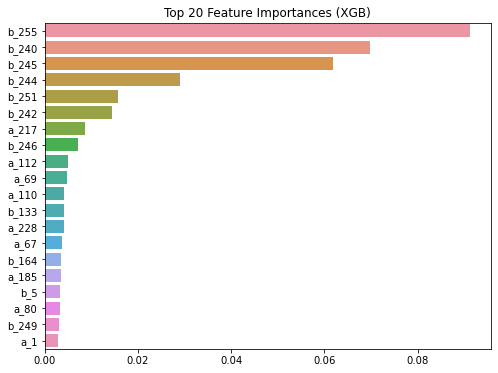

In [77]:
ft_importance_values = xgb.feature_importances_

ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances (XGB)')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

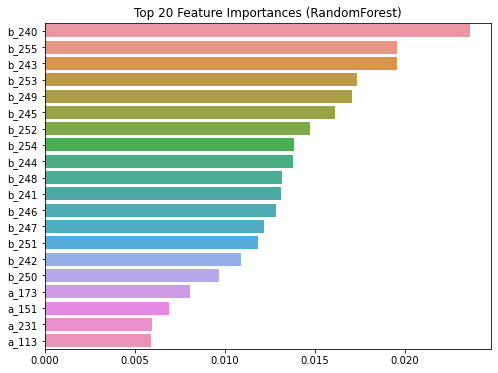

In [78]:
ft_importance_values = forest.feature_importances_

ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances (RandomForest)')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

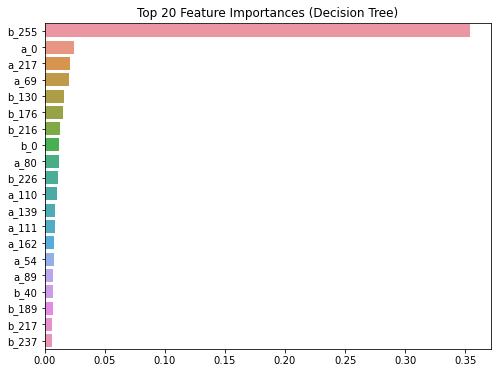

In [79]:
ft_importance_values = dt_clf.feature_importances_

ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances (Decision Tree)')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

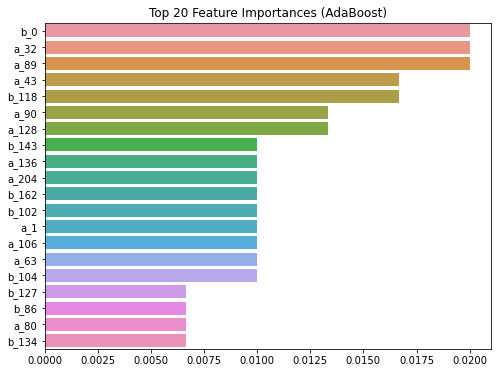

In [80]:
ft_importance_values = ada_clf.feature_importances_

ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances (AdaBoost)')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

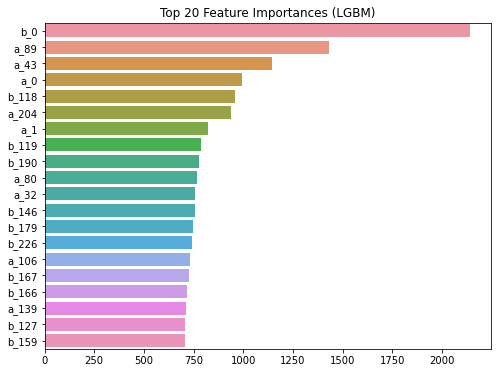

In [85]:
ft_importance_values = lgbm.feature_importances_

ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances (LGBM)')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

In [86]:
"""
f,ax = plt.subplots(ncols=2, figsize=(15,8))

sns.boxplot(x='label', y='b_255', data=train_df, ax=ax[0])
ax[0].set_title('b_255 vs label')

sns.boxplot(x='label', y='b_240', data=train_df, ax=ax[1])
ax[0].set_title('b_240 vs label')
"""

"\nf,ax = plt.subplots(ncols=2, figsize=(15,8))\n\nsns.boxplot(x='label', y='b_255', data=train_df, ax=ax[0])\nax[0].set_title('b_255 vs label')\n\nsns.boxplot(x='label', y='b_240', data=train_df, ax=ax[1])\nax[0].set_title('b_240 vs label')\n"

In [12]:
data_copy = train_df2.copy()

In [13]:
def remove_outlier_0(df, column):
    fraud_column_data = df[df['label']==0][column]
    quantile_25 = np.percentile(fraud_column_data.values, 25)
    quantile_75 = np.percentile(fraud_column_data.values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR * 1.5
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = fraud_column_data[ (fraud_column_data < lowest) | (fraud_column_data > highest) ].index
    print(len(outlier_idx))
    df.drop(outlier_idx, axis=0, inplace=True)
    print(df.shape)
    return df

In [14]:
def remove_outlier_1(df, column):
    fraud_column_data = df[df['label']==1][column]
    quantile_25 = np.percentile(fraud_column_data.values, 25)
    quantile_75 = np.percentile(fraud_column_data.values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR * 1.5
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = fraud_column_data[ (fraud_column_data < lowest) | (fraud_column_data > highest) ].index
    print(len(outlier_idx))
    df.drop(outlier_idx, axis=0, inplace=True)
    print(df.shape)
    return df

In [15]:
data_copy = remove_outlier_0(data_copy, 'b_255')

972
(9028, 617)


In [16]:
data_copy_x = data_copy.drop(columns=['label'], axis=1)

In [17]:
data_copy_y = data_copy['label']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data_copy_x, data_copy_y, test_size=0.2, random_state=42)

In [99]:
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)

[15:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [100]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       714
           1       0.98      0.94      0.96      1092

    accuracy                           0.95      1806
   macro avg       0.95      0.95      0.95      1806
weighted avg       0.95      0.95      0.95      1806



In [101]:
accuracy_score(y_test, pred)

0.9507198228128461

In [102]:
confusion_matrix(y_test, pred)

array([[ 690,   24],
       [  65, 1027]], dtype=int64)

In [103]:
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [104]:
forest.score(x_test, y_test)

0.9318936877076412

In [19]:
data_copy = remove_outlier_1(data_copy, 'b_255')

630
(8398, 617)


In [20]:
data_copy_x = data_copy.drop(columns=['label'], axis=1)

In [21]:
data_copy_y = data_copy['label']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data_copy_x, data_copy_y, test_size=0.2, random_state=42)

In [109]:
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)

[16:01:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:01:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [110]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       721
           1       0.98      0.93      0.96       959

    accuracy                           0.95      1680
   macro avg       0.95      0.95      0.95      1680
weighted avg       0.95      0.95      0.95      1680



In [111]:
accuracy_score(y_test, pred)

0.950595238095238

In [112]:
confusion_matrix(y_test, pred)

array([[701,  20],
       [ 63, 896]], dtype=int64)

In [113]:
forest.fit(x_train, y_train)
forest.score(x_test, y_test)

0.9416666666666667

b_240의 이상치도 제거하고 시험해보기

In [23]:
data_copy = remove_outlier_0(data_copy, 'b_240')

796
(7602, 617)


In [24]:
data_copy = remove_outlier_1(data_copy, 'b_240')

805
(6797, 617)


In [25]:
data_copy_x = data_copy.drop(columns=['label'], axis=1)

In [26]:
data_copy_y = data_copy['label']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(data_copy_x, data_copy_y, test_size=0.2, random_state=42)

In [28]:
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)

[17:56:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:56:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       555
           1       1.00      0.96      0.98       805

    accuracy                           0.98      1360
   macro avg       0.97      0.98      0.98      1360
weighted avg       0.98      0.98      0.98      1360



In [30]:
accuracy_score(y_test, pred)

0.9772058823529411

In [31]:
confusion_matrix(y_test, pred)

array([[554,   1],
       [ 30, 775]], dtype=int64)

In [32]:
forest.fit(x_train, y_train)
forest.score(x_test, y_test)

0.9661764705882353

In [33]:
confusion_matrix(y_test, pred)

array([[554,   1],
       [ 30, 775]], dtype=int64)

In [34]:
dt_clf.fit(x_train, y_train)
dt_clf.score(x_test, y_test)

0.9404411764705882

In [35]:
confusion_matrix(y_test, pred)

array([[554,   1],
       [ 30, 775]], dtype=int64)

In [38]:
lgbm.fit(x_train, y_train)
pred = lgbm.predict(x_test)

In [39]:
accuracy_score(y_test, pred)

0.9764705882352941

In [40]:
confusion_matrix(y_test, pred)

array([[550,   5],
       [ 27, 778]], dtype=int64)

## feature_importance & remove_outlier + stacking ensemble

In [123]:
stack = StackingTransformer(estimators, 
                            regression = False, 
                            metric = accuracy_score, 
                            n_folds = 10, stratified = True, shuffle = True, 
                            random_state = 42)

In [124]:
estimators = [  ('XGBoost', xgb),
                ('LightGBM', lgbm),
                ('RandomForest', forest),
                ('Knn', knn),
                ('DecisionTree', dt_clf),
                ('GuassianNaive', gaussian)]

In [125]:
stack = stack.fit(x_train, y_train)

[21:39:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:39:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:40:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some pa

In [126]:
s_train = stack.transform(x_train)
s_test = stack.transform(x_test)

In [127]:
s_model = xgb.fit(s_train, y_train)
s_model_prediction =  s_model.predict(s_test)
# accuracy = round(accuracy_score(y_test, s_model_prediction) * 100, 5)
# print("Accuracy : ", accuracy, "%")
accuracy_score(y_test, s_model_prediction)

[21:55:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:55:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9779411764705882

In [128]:
confusion_matrix(y_test, s_model_prediction)

array([[552,   3],
       [ 27, 778]], dtype=int64)

## feature_importance & remove_outlier + Soft Voting Ensemble

In [41]:
from sklearn.ensemble import VotingClassifier

In [278]:
voting_estimators = [ ('XGBoost', xgb),
                    ('LightGBM', lgbm),
                    ('RandomForest', forest)]

In [109]:
voting_estimators = [ ('XGBoost', xgb),
                    ('LightGBM', lgbm),
                    ('RandomForest', forest),
                    ('Knn', knn),
                    ('DecisionTree', dt_clf),
                    ('GuassianNaive', gaussian)]

In [115]:
voting_model = VotingClassifier(estimators= voting_estimators, voting='soft')

In [116]:
voting_model.fit(x_train, y_train)
pred = voting_model.predict(x_test)

[20:54:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:54:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [117]:
accuracy_score(y_test, pred)

0.9713235294117647

In [118]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       555
           1       0.99      0.96      0.98       805

    accuracy                           0.97      1360
   macro avg       0.97      0.97      0.97      1360
weighted avg       0.97      0.97      0.97      1360



In [119]:
confusion_matrix(y_test, pred)

array([[551,   4],
       [ 35, 770]], dtype=int64)

xgb + lgbm (soft) = 0.977  
xgb + lgbm + rf (soft) = 0.977  
xgb + lgbm + rf (hard) = 0.975  
xgb + lgbm + rf + gaussian + sgd + knn + svc (hard) = 0.949  
xgb + lgbm + rf + gaussian + sgd + knn (soft) = 0.961  
xgb + lgbm + rf + gaussian + sgd + knn (hard) = 0.9595  
xgb + lgbm + rf + gaussian + knn (soft) = 0.9691  
xgb + lgbm + rf + gaussian + knn (hard) = 0.9713  
xgb + lgbm + rf + gaussian + knn + perceptron (hard) = 0.9529  
xgb + lgbm + rf + knn (soft) = 0.9757  
xgb + lgbm + rf + knn (hard) = 0.9661  
xgb + lgbm + rf + knn + dt (soft) = 0.975  
xgb + lgbm + rf + knn + dt (hard) = 0.973  
xgb + lgbm + rf + knn + dt + gaussian (hard) = 0.969  
xgb + lgbm + rf + knn + dt + gaussian (soft) = 0.971  

In [202]:
forest.fit(x_train, y_train)
pred = forest.predict(x_test)

In [203]:
accuracy_score(y_test, pred)

0.9661764705882353

In [204]:
confusion_matrix(y_test, pred)

array([[553,   2],
       [ 44, 761]], dtype=int64)

## feature_importance & remove_outlier + GridSearch (XGBoost)

In [136]:
from sklearn.model_selection import GridSearchCV
from datetime import datetime

In [130]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [134]:
xgb_clf = XGBClassifier(silent=False,
                            n_estimators = 10000,
                            booster='gbtree',
                            tree_method='gpu_hist',
                            preidctor= 'gpu_predictor',
                            scale_pos_weight=1,
                            learning_rate=0.02,
                            objective='binary:logistic', 
                            seed=42)

In [137]:
xgb_param_grid = {'max_depth': [7, 9, 13, 15],
                  'subsample': [0.8, 0.9, 1.0],
                  'min_child_weight': [0.8, 1.0, 1.2],
                  'colsample_bytree': [0.8, 1.0],
                 }

hr_grid = GridSearchCV(estimator=xgb_clf,
                       param_grid=xgb_param_grid,
                       scoring='roc_auc',
                       n_jobs=5,
                       cv=3,
                       refit=True, 
                       return_train_score=True)

start_time = timer(None)
hr_grid.fit(x_train, y_train)
timer(start_time)

[21:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 3 hours 46 minutes and 6.43 seconds.


In [138]:
hr_grid_df = pd.DataFrame(hr_grid.cv_results_)
hr_grid_df.loc[:, ['mean_test_score', "params"]]

,mean_test_score,params
0,0.991421,"{'colsample_bytree': 0.8, 'max_depth': 7, 'min..."
1,0.991617,"{'colsample_bytree': 0.8, 'max_depth': 7, 'min..."
2,0.991251,"{'colsample_bytree': 0.8, 'max_depth': 7, 'min..."
3,0.991340,"{'colsample_bytree': 0.8, 'max_depth': 7, 'min..."
4,0.991573,"{'colsample_bytree': 0.8, 'max_depth': 7, 'min..."
...,...,...
67,0.991487,"{'colsample_bytree': 1.0, 'max_depth': 15, 'mi..."
68,0.991149,"{'colsample_bytree': 1.0, 'max_depth': 15, 'mi..."
69,0.991429,"{'colsample_bytree': 1.0, 'max_depth': 15, 'mi..."
70,0.991566,"{'colsample_bytree': 1.0, 'max_depth': 15, 'mi..."


In [139]:
hr_grid_df[hr_grid_df['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_max_depth,param_min_child_weight,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1,302.330013,2.052321,0.05452,0.004631,0.8,7,0.8,0.9,"{'colsample_bytree': 0.8, 'max_depth': 7, 'min...",0.991638,0.993833,0.98938,0.991617,0.001818,1,1.0,1.0,1.0,1.0,0.0


In [142]:
## 최고성능
best_score = hr_grid.best_score_
# 최고성능을 내는 행을 찾아냄
best_row = hr_grid.best_index_

# 최적 초모수: max_depth, subsample
best_max_depth = hr_grid.best_params_["max_depth"]
best_max_subsample = hr_grid.best_params_["subsample"]
best_min_child_weight = hr_grid.best_params_["min_child_weight"]
best_colsample_bytree = hr_grid.best_params_["colsample_bytree"]


nl = '\n'
print(f'예측모형성능(AUC):  \t {best_score:.3f}{nl}\
        인덱스:           \t {best_row}{nl}\
        max_depth:      \t {best_max_depth}{nl}\
        subsample:      \t {best_max_subsample}{nl}\
        colsample_bytree:      \t {best_colsample_bytree}{nl}\
        min_child_weight:      \t {best_min_child_weight}')

예측모형성능(AUC):  	 0.992
        인덱스:           	 1
        max_depth:      	 7
        subsample:      	 0.9
        colsample_bytree:      	 0.8
        min_child_weight:      	 0.8


In [143]:
pred = hr_grid.predict(x_test)

In [144]:
accuracy_score(y_test, pred)

0.9772058823529411